# 자동차 연비 예측하기 : regression
- 데이터는 Auto MPG데이터셋 사용

In [3]:
# !pip install -q seaborn

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.2


## Data Load

In [10]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(dataset_path)
dataset_path = './data/auto-mpg.data'

C:\Users\aaa\.keras\datasets\auto-mpg.data


In [11]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [15]:
dataset = raw_dataset.copy()   # 복사
dataset
#dataset.head()
#dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


## Data Preprocessing

In [17]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

- dataset 누락된 행 삭제

In [18]:
dataset = dataset.dropna()

In [19]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

- "Origin"은 생산 국가로 1 : USA, 2 : Europe, 3 : Japan이다.
- "Origin"은 범주형이여서 원핫 인코딩하여 수치형으로 변환
- "Origin"이 숫자인데 왜 원핫??? 이유는 다른 컬럼들은 수치에 따라 연속적이나 "Origin"은 범주형임

```
data = {'sample':[1,2,3,3,1]}
dataF = pd.DataFrame(data)

# 원핫인코딩해 줄 범주형 데이터를 pop한다.
datapop = dataF.pop('sample')

# 새로운 컬럼을 만들고 해당 pop한 범주형 값을 같은지(True) 다른지(False)로 판단
dataF['a'] = (datapop == 1)
dataF['b'] = (datapop == 2)
dataF['c'] = (datapop == 3)
dataF
```

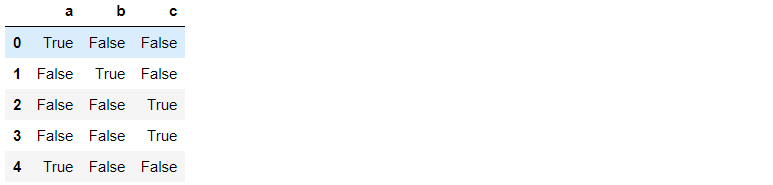

```
# True에 *1
dataF['a'] = dataF['a'] * 1.0
dataF['b'] = dataF['b'] * 1.0
dataF['c'] = dataF['c'] * 1.0
dataF
```

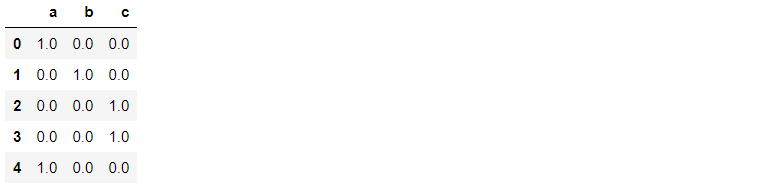